# <p style='text-align: center;'> IMDB ANALYSIS </p>


### <p style='text-align: center;'> Notebook with data analysis about IMDB database </p>
### <p style='text-align: left;'> source: https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset  </p>
### <p style='text-align: left;'> author: Fabrício da Silva </p>

### ETL

#### IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
% matplotlib inline

#### EXTRACT THE DATA 

In [3]:
df_imdb = pd.read_csv('IMDb movies.csv')
df_imdb.head(2)

C:\Users\sfsrj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


#### VERIFYING THE COLUMNS

In [4]:
df_imdb.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

#### VERIFYING THE ROWS AND COLUMNS

In [5]:
df_imdb.shape

(85855, 22)

#### NULLS AND TYPES PER COLUMNS

In [6]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 22 columns):
imdb_title_id            85855 non-null object
title                    85855 non-null object
original_title           85855 non-null object
year                     85855 non-null object
date_published           85855 non-null object
genre                    85855 non-null object
duration                 85855 non-null int64
country                  85791 non-null object
language                 85022 non-null object
director                 85768 non-null object
writer                   84283 non-null object
production_company       81400 non-null object
actors                   85786 non-null object
description              83740 non-null object
avg_vote                 85855 non-null float64
votes                    85855 non-null int64
budget                   23710 non-null object
usa_gross_income         15326 non-null object
worlwide_gross_income    31016 non-null object

#### DUPLICATES

In [7]:
df_imdb.duplicated().sum()

0

#### FUNCTION CLEAN

In [8]:
# ALGUMAS COLUNAS NUMÉRICAS ESTAVAM APRESENTANDO LETRAS.
# A FUNÇÃO ABAIXO AS RETIRA E MANTÉM SOMENTE OS DADOS NUMÉRICOS
def clean (col): 
    new_col = []
    for y in df_imdb[col]:
        new_col.append(re.sub("[^0-9]","",str(y))) #REGULAR EXPRESSION PARA MANTER APENAS OS NÚMEROS
    df_imdb[col] = new_col

#### CLEANING AND CHANGING THE TYPES

In [9]:
# ALGUMAS CÉLULAS DA COLUNA 'YEAR' CONTÉM LETRAS
clean('year')

In [10]:
df_imdb['year'] = df_imdb['year'].astype('int64') #MODIFICA O TIPO
print('The column year is now: {}'.format(df_imdb['year'].dtypes))

The column year is now: int64


In [11]:
# ALGUMAS CÉLULAS DA COLUNA 'DATE_PUBLISHED' ESTÃO FORA DO FORMATO
clean('date_published')

In [12]:
df_imdb['date_published'] = pd.to_datetime(df_imdb['date_published'], format = '%Y-%m-%d') #modifica para o formato yyyy-mm-dd
print('The column date_published is now: {}'.format(df_imdb['date_published'].dtypes))

The column date_published is now: datetime64[ns]


In [13]:
# ALGUMAS CÉLULAS DA COLUNA 'BUDGET' CONTÉM LETRAS E HÁ MUITOS DADOS NULOS
df_imdb['budget'].fillna('0' , inplace = True) # SUBSTITUI O NULO PELO ZERO
clean('budget')

In [14]:
df_imdb['budget'] = df_imdb['budget'].astype('float64') # MODIFICA O TIPO
print('The column budget: {}'.format(df_imdb['budget'].dtypes))

The column budget: float64


In [15]:
# ALGUMAS CÉLULAS DA COLUNA 'USA_GROSS_INCOME' CONTÉM LETRAS E HÁ MUITOS DADOS NULOS
df_imdb['usa_gross_income'].fillna('0' , inplace = True) # SUBSTITUI O NULO PELO ZERO
clean('usa_gross_income')

In [16]:
df_imdb['usa_gross_income'] = df_imdb['usa_gross_income'].astype('int64')
print('The column usa_gross_income is now: {}'.format(df_imdb['usa_gross_income'].dtypes))

The column usa_gross_income is now: int64


In [19]:
# ALGUMAS CÉLULAS DA COLUNA 'WORLDWIDE_GROSS_INCOME' CONTÉM LETRAS E HÁ MUITOS DADOS NULOS
df_imdb['worlwide_gross_income'].fillna('0' , inplace = True) # SUBSTITUI O NULO PELO ZERO
clean('worlwide_gross_income')

In [20]:
df_imdb['worlwide_gross_income'] = df_imdb['worlwide_gross_income'].astype('float64')# MODIFICA O TIPO
print('The column worlwide_gross_income is now: {}'.format(df_imdb['worlwide_gross_income'].dtypes))

The column worlwide_gross_income is now: float64


#### TREATING THE  OTHER NULLS

In [21]:
# AS COLUNAS "BUDGET", "USA_GROSS_INCOME" AND "WORLWIDE_GROSS_INCOME" FORAM TRATADAS ANTERIORMENTE
# SERÃO TRATADOS OS NULOS DAS COLUNAS 'review_from_users' and review from critics
def drops (col):
    df_imdb[col].fillna('0' , inplace = True)
    
drops('reviews_from_users')
drops('reviews_from_critics')

print(df_imdb['reviews_from_users'].isnull().sum() , df_imdb['reviews_from_critics'].isnull().sum())

0 0


#### SAVE IN CSV FILE

In [22]:
df_imdb.to_csv('IMDB_clean.csv')

### ANALYSIS

#### EXTRACT THE CLEAN DATA

In [23]:
df_imdb = pd.read_csv('IMDB_clean.csv')
df_imdb.head(2)

,Unnamed: 0,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,0.0,0,0.0,NaN,1.0,2.0
1,1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,2250.0,0,0.0,NaN,7.0,7.0


In [24]:
df_imdb.describe()

,Unnamed: 0,year,duration,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,85855.000000,85855.000000,8.585500e+04,8.585500e+04,8.585500e+04,8.585500e+04,13305.000000,85855.000000,85855.000000
mean,42927.000000,1993.500891,100.351418,5.898656,9.493490e+03,2.919385e+07,3.479775e+06,8.339442e+06,55.896881,41.966839,23.704071
std,24784.348018,24.216420,22.553848,1.234987,5.357436e+04,1.456807e+09,2.170666e+07,5.531962e+07,17.784874,170.931358,55.002744
min,0.000000,1894.000000,41.000000,1.000000,9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,21463.500000,1979.000000,88.000000,5.200000,2.050000e+02,0.000000e+00,0.000000e+00,0.000000e+00,43.000000,2.000000,2.000000
50%,42927.000000,2003.000000,96.000000,6.100000,4.840000e+02,0.000000e+00,0.000000e+00,0.000000e+00,57.000000,8.000000,6.000000
75%,64390.500000,2013.000000,108.000000,6.800000,1.766500e+03,1.000000e+05,0.000000e+00,2.114660e+05,69.000000,23.000000,19.000000
max,85854.000000,2020.000000,808.000000,9.900000,2.278845e+06,3.500000e+11,9.366622e+08,2.797801e+09,100.000000,10472.000000,999.000000


#### THE THOUSAND HIGHEST RATED MOVIES FROM THE YEAR 2000

In [25]:
df_imdb_news = df_imdb[df_imdb['year'] >= 2000] #FILTRA OS FILMES LANÇADOS A PARTIR DO ANO 2000
df_imdb_rank = df_imdb_news[['title' ,'avg_vote', 'votes', 'director','actors']]
df_rank = df_imdb_rank.sort_values(by='avg_vote', ascending = False)[0:1000] # RANQUEIA PELOS PRIMEIROS 1000 FILMES
df_rank.to_csv('ranking_imdb.csv') # GUARDA NUM CSV

#### FILM DIRECTORS

In [26]:
df_ranking = pd.read_csv('ranking_imdb.csv')
directors = df_ranking[['title','director','avg_vote']]
df_directors= pd.DataFrame(directors)
df_directors.head(10)

,title,director,avg_vote
0,Suvarna Sundari,Msn Surya,9.9
1,Notuku Potu,Basheed S.K.,9.8
2,Jeeudo,Aalmist Subba,9.8
3,Ek,Sampath Rudra,9.8
4,Lejos de Casa pelicula Venezolana,Abner Official,9.8
5,Meka Suri,Trinadh Velisila,9.7
6,Hopeful Notes,Valerio Zanoli,9.7
7,Vaarthakal Ithuvare,Manoj Nair,9.7
8,The Moving on Phase,Don Tjernagel,9.5
9,Isha,Jose Thomas,9.5


#### FILM ACTORS

In [28]:
actors = df_ranking[['title','actors','avg_vote']]
df_actor= pd.DataFrame(actors)
df_actor.head(10)

,title,actors,avg_vote
0,Suvarna Sundari,"Shamna Kasim, Sakshi Chaudhary, Jaya Prada, Av...",9.9
1,Notuku Potu,"Mumait Khan, Manisha Koirala, Arjun Sarja",9.8
2,Jeeudo,"Prashant Baraili, Davina, Pranisha Gahatraj, P...",9.8
3,Ek,"Bishnu Adhikari, Himanshi Khurana, Aparna Shar...",9.8
4,Lejos de Casa pelicula Venezolana,"Angibell, Gabriel Buitrago, Darwing, Dariana J...",9.8
5,Meka Suri,"Abhinay, Naresh Byreddy, Sharat Kumar, Sravan,...",9.7
6,Hopeful Notes,"Walter Nudo, Colin Ross, Ian Poland, Laural Me...",9.7
7,Vaarthakal Ithuvare,"Siju Wilson, Nandu, Vinay Forrt, Mammukoya, Al...",9.7
8,The Moving on Phase,"Matt Anderson, Clint Boevers, Jillian Brown, C...",9.5
9,Isha,"Kishore Satya, Abhishek Vinod",9.5


#### INTERSECTION

In [29]:
inter_dir = df_ranking[['title', 'director']]
inter_act = df_ranking[['title' , 'actors']]
inter = inter_dir.merge(inter_act , on = 'title') #UNE OS DOIS DATAFRAMES CRIADOS ANTERIORMENTE PELA CHAVE 'TITLE'
inter.head(10)

,title,director,actors
0,Suvarna Sundari,Msn Surya,"Shamna Kasim, Sakshi Chaudhary, Jaya Prada, Av..."
1,Notuku Potu,Basheed S.K.,"Mumait Khan, Manisha Koirala, Arjun Sarja"
2,Jeeudo,Aalmist Subba,"Prashant Baraili, Davina, Pranisha Gahatraj, P..."
3,Ek,Sampath Rudra,"Bishnu Adhikari, Himanshi Khurana, Aparna Shar..."
4,Lejos de Casa pelicula Venezolana,Abner Official,"Angibell, Gabriel Buitrago, Darwing, Dariana J..."
5,Meka Suri,Trinadh Velisila,"Abhinay, Naresh Byreddy, Sharat Kumar, Sravan,..."
6,Hopeful Notes,Valerio Zanoli,"Walter Nudo, Colin Ross, Ian Poland, Laural Me..."
7,Vaarthakal Ithuvare,Manoj Nair,"Siju Wilson, Nandu, Vinay Forrt, Mammukoya, Al..."
8,The Moving on Phase,Don Tjernagel,"Matt Anderson, Clint Boevers, Jillian Brown, C..."
9,Isha,Jose Thomas,"Kishore Satya, Abhishek Vinod"


#### TEN BEST GENRES

Text(0.5,0,'Genres')

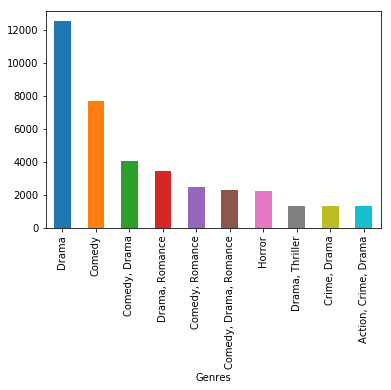

In [30]:
# OS 10 GÊNEROS MAIS PRODUZIDOS
genre = df_imdb['genre'].value_counts() 
genre[0:10].plot.bar()
plt.xlabel('Genres')

#### THE COUNTRIES THAT MOST PRODUCED MOVIES

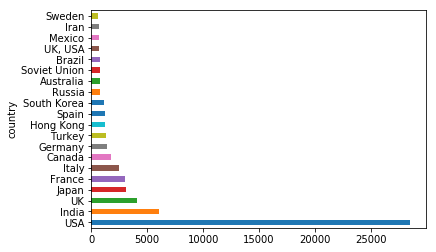

In [31]:
# OS 20 PAÍSES QUE MAIS LANÇAM FILMES
dir_genr =df_imdb['title'].groupby(df_imdb['country']).count()
dir_genr.sort_values(ascending = False)[0:20].plot.barh()

#### RELATIONSHIP BETWEEN VOTES AND AVERAGE

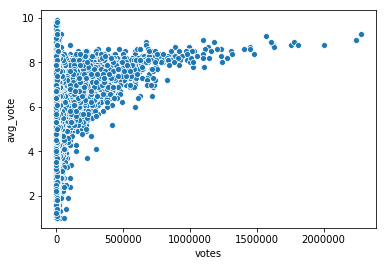

In [32]:
# RELAÇÃO ENTRE NOTA MÉDIA E NÚMERO DE VOTOS RECEBIDOS
bud_plot= sns.scatterplot(x='votes',y = 'avg_vote', data = df_imdb )


#### MOVIES WITH MAX AND MIN VOTES

In [33]:
df_imdb[df_imdb['votes'] == df_imdb['votes'].max()][['title' , 'votes']]

,title,votes
28453,Le ali della libertà,2278845


In [34]:
df_imdb[df_imdb['votes'] == df_imdb['votes'].min()][['title' , 'votes']]

,title,votes
42836,Toutes ces belles promesses,99
65224,Töchter,99
79882,The Baylock Residence,99
79933,Santa Fake,99
81474,My Name Is Myeisha,99


#### CORRECTED AVG_VOTE

#### Como proposto, será aplicada uma correção na nota média de cada filme em função do número de votos recebidos
#### O 'avg_vote' de cada filme que estiver com número de votos('votes') abaixo da mediana, perderá pontos na seguinte ordem:
##### percentil 40 até  50: - 0.2 pts
##### percentil 30 até  40: - 0.4 pts
##### percentil 20 até  30: - 0.6 pts
##### percentil 10 até  20: - 0.8 pts
##### percentil 0 até  10: - 1.0 pts
##### Filmes com número de votos acima da mediana não serão penalizados


In [35]:
# DESCOBRINDO OS PERCENTIS
print(np.percentile(df_imdb['votes'],50))
print(np.percentile(df_imdb['votes'],40))
print(np.percentile(df_imdb['votes'],30))
print(np.percentile(df_imdb['votes'],20))
print(np.percentile(df_imdb['votes'],10))

484.0
335.0
240.0
176.0
131.0


In [36]:
# CRIANDO OS FATORES DE CORREÇÃO
fator_corr=[]
for vot in df_imdb['votes']:
    
    if (vot < 484) and (vot >= 335):
        fator_corr.append(0.2)
    elif (vot < 335) and (vot >= 240):
        fator_corr.append(0.4)
    elif (vot < 240) and (vot >= 176):
        fator_corr.append(0.6)
    elif (vot < 176) and (vot >= 131):
        fator_corr.append(0.8)
    elif vot < 131:
        fator_corr.append(1.0)
    elif vot >= 484:
        fator_corr.append(0)

In [37]:
# CRIANDO UM NOVO DATAFRAME COM OS VOTOS CORRIGIDOS
df_corr = df_imdb[['title' , 'votes' , 'avg_vote']]
df_corr['fator_corr'] = fator_corr
df_corr['voto_corr'] = df_corr['avg_vote'] - df_corr['fator_corr']
df_corr.head(20)

C:\Users\sfsrj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sfsrj\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,title,votes,avg_vote,fator_corr,voto_corr
0,Miss Jerry,154,5.9,0.8,5.1
1,The Story of the Kelly Gang,589,6.1,0.0,6.1
2,Den sorte drøm,188,5.8,0.6,5.2
3,Cleopatra,446,5.2,0.2,5.0
4,L'Inferno,2237,7.0,0.0,7.0
5,"From the Manger to the Cross; or, Jesus of Naz...",484,5.7,0.0,5.7
6,Madame DuBarry,753,6.8,0.0,6.8
7,Quo Vadis?,273,6.2,0.4,5.8
8,Independenta Romaniei,198,6.7,0.6,6.1
9,Richard III,225,5.5,0.6,4.9
